In [6]:
#importamos las librerias necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

KPI Propuesto (Aumento del 2% Proyectado de Acceso a Internet por Provincia):
              Provincia  KPI_Propuesto
0          Buenos Aires            2.0
1       Capital Federal            2.0
2             Catamarca            2.0
3                 Chaco            2.0
4                Chubut            2.0
5               Córdoba            2.0
6            Corrientes            2.0
7            Entre Ríos            2.0
8               Formosa            2.0
9                 Jujuy            2.0
10             La Pampa            2.0
11             La Rioja            2.0
12              Mendoza            2.0
13             Misiones            2.0
14              Neuquén            2.0
15            Río Negro            2.0
16                Salta            2.0
17             San Juan            2.0
18             San Luis            2.0
19           Santa Cruz            2.0
20             Santa Fe            2.0
21  Santiago Del Estero            2.0
22     Tierra Del Fuego  

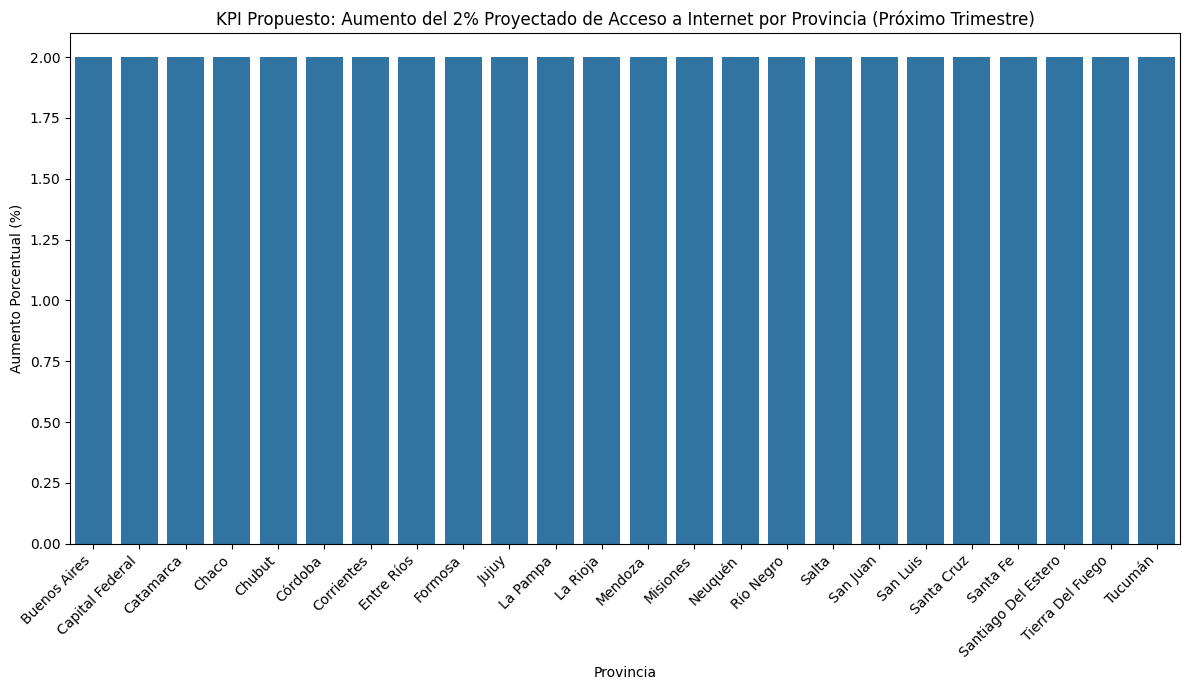

In [7]:
# DataFrame con los datos actuales de accesos por cada 100 habitantes (Q2 2024)
data_actual = {
    'Provincia': ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
    'Acceso_actual_por_100_hogares': [27.43, 47.44, 17.50, 11.78, 26.46, 27.79, 13.53, 20.52, 10.10, 14.91, 33.33, 21.17, 14.60, 15.72, 23.49, 21.95, 13.49, 13.03, 29.59, 20.80, 25.58, 12.33, 32.28, 15.07]
}

df_actual = pd.DataFrame(data_actual)

# Calcular el "Nuevo acceso" que representa un aumento del 2%
df_actual['Nuevo_acceso_proyectado_por_100_hogares'] = df_actual['Acceso_actual_por_100_hogares'] * (1 + 0.02)

# Calcular el KPI  será 2% para todas las provincias
df_actual['KPI_Propuesto'] = ((df_actual['Nuevo_acceso_proyectado_por_100_hogares'] - df_actual['Acceso_actual_por_100_hogares']) / df_actual['Acceso_actual_por_100_hogares']) * 100

print("KPI Propuesto (Aumento del 2% Proyectado de Acceso a Internet por Provincia):")
print(df_actual[['Provincia', 'KPI_Propuesto']])

# Graficar el KPI Propuesto
plt.figure(figsize=(12, 7))
sns.barplot(x='Provincia', y='KPI_Propuesto', data=df_actual)
plt.title('KPI Propuesto: Aumento del 2% Proyectado de Acceso a Internet por Provincia (Próximo Trimestre)')
plt.ylabel('Aumento Porcentual (%)')
plt.xlabel('Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Guardar el DataFrame resultante (df_actual) en un archivo CSV
nombre_archivo_kpi = 'kpi_propuesto_por_provincia.csv'
df_actual.to_csv(nombre_archivo_kpi, index=False)

print(f"\nEl DataFrame resultante ha sido guardado en el archivo: {nombre_archivo_kpi}")


El DataFrame resultante ha sido guardado en el archivo: kpi_propuesto_por_provincia.csv


KPI Adicional 1: Brecha de Penetración = 37.34 accesos por cada 100 habitantes


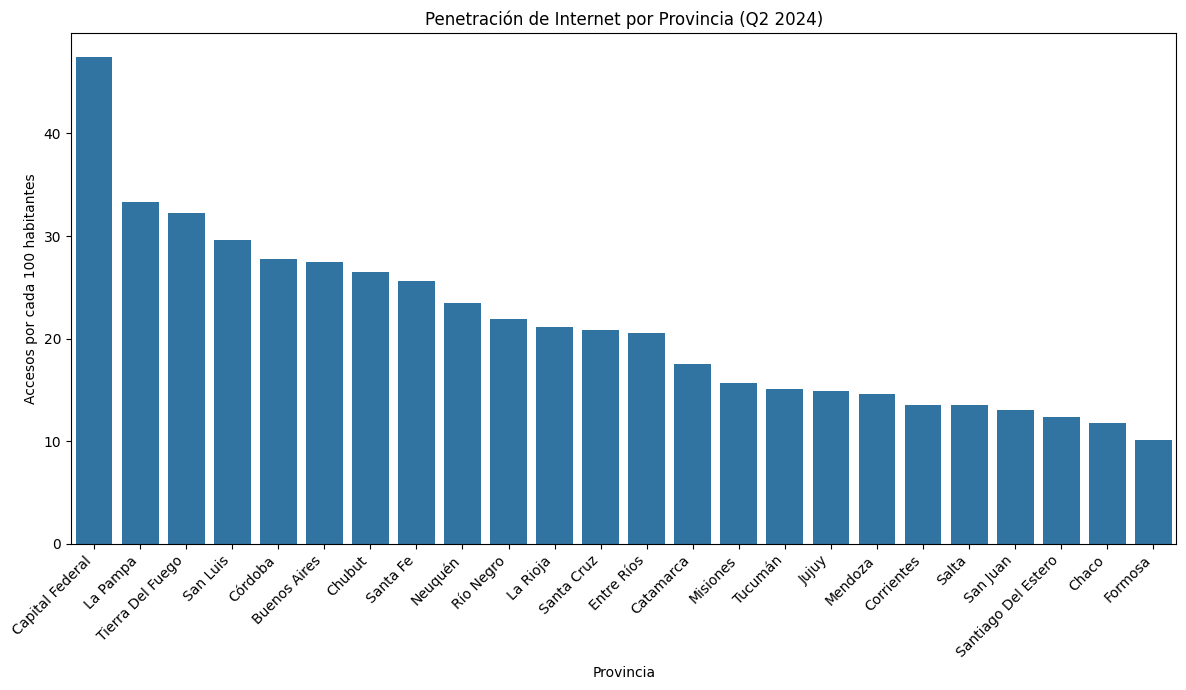

In [9]:
#KPI Adicional 1: Brecha de Penetración entre Provincias

# Cargar el archivo de penetración
df_penetracion = pd.read_csv('penetracion_por_provincia.csv')

# Calcular la penetración máxima y mínima
max_penetration = df_penetracion['Accesos por cada 100 hab'].max()
min_penetration = df_penetracion['Accesos por cada 100 hab'].min()

# Calcular el KPI de brecha de penetración
kpi_brecha_penetration = max_penetration - min_penetration

print(f"KPI Adicional 1: Brecha de Penetración = {kpi_brecha_penetration:.2f} accesos por cada 100 habitantes")

# Graficar la penetración por provincia para visualizar la brecha
plt.figure(figsize=(12, 7))
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=df_penetracion.sort_values(by='Accesos por cada 100 hab', ascending=False))
plt.title('Penetración de Internet por Provincia (Q2 2024)')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xlabel('Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Guardar el DataFrame de brecha de penetración en un archivo CSV
nombre_archivo_brecha = 'kpi_brecha_penetration.csv'
df_penetracion.to_csv(nombre_archivo_brecha, index=False)
print(f"El DataFrame de Brecha de Penetración ha sido guardado en: {nombre_archivo_brecha}")

El DataFrame de Brecha de Penetración ha sido guardado en: kpi_brecha_penetration.csv


KPI Adicional 2: Adopción de Fibra Óptica = 36.08%
KPI Adicional 2: Adopción de Tecnologías Legadas = 57.12%


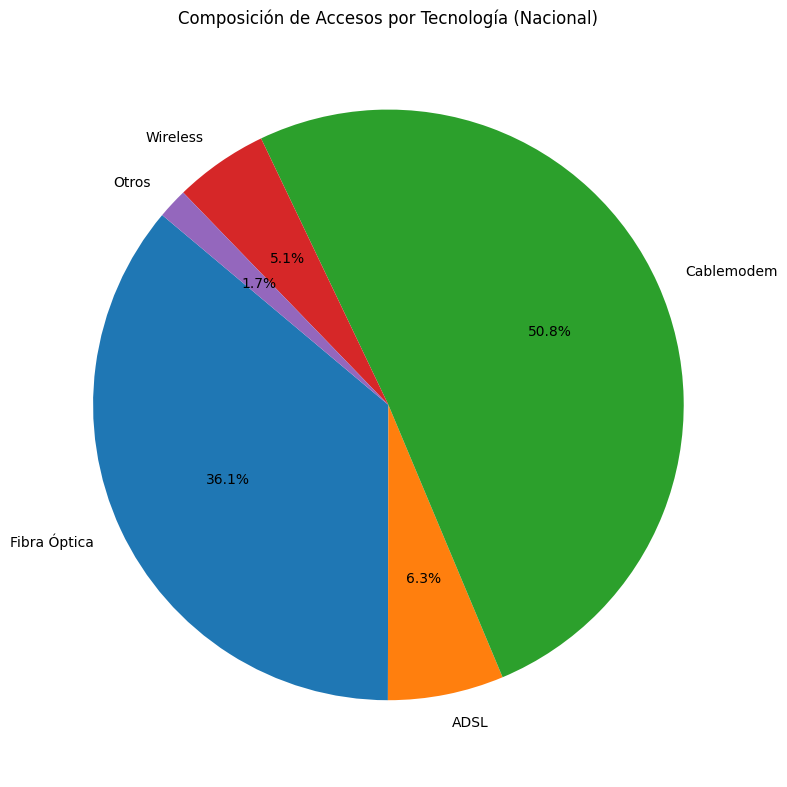

In [10]:
#KPI Adicional 2: Porcentaje de Accesos de Fibra Óptica vs. Tecnologías Legadas

# Cargar el archivo de accesos por provincia
df_accesos = pd.read_csv('accesos_por_provincia.csv')

# Calcular los totales de accesos
total_accesos = df_accesos['Total'].sum()
total_fibra_optica = df_accesos['Fibra óptica'].sum()
total_legadas = df_accesos['ADSL'].sum() + df_accesos['Cablemodem'].sum()

# Calcular los KPIs
kpi_adopcion_fibra = (total_fibra_optica / total_accesos) * 100
kpi_tecnologias_legadas = (total_legadas / total_accesos) * 100

print(f"KPI Adicional 2: Adopción de Fibra Óptica = {kpi_adopcion_fibra:.2f}%")
print(f"KPI Adicional 2: Adopción de Tecnologías Legadas = {kpi_tecnologias_legadas:.2f}%")

# Graficar la composición de tecnologías a nivel nacional
labels = ['Fibra Óptica', 'ADSL', 'Cablemodem', 'Wireless', 'Otros']
total_por_tecnologia = [df_accesos['Fibra óptica'].sum(), df_accesos['ADSL'].sum(), df_accesos['Cablemodem'].sum(), df_accesos['Wireless'].sum(), df_accesos['Otros'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(total_por_tecnologia, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Composición de Accesos por Tecnología (Nacional)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [14]:
# Guardar el DataFrame de adopción tecnológica en un archivo CSV
nombre_archivo_adopcion = 'kpi_adopcion_tecnologica.csv'
df_accesos.to_csv(nombre_archivo_adopcion, index=False)
print(f"El DataFrame de Adopción Tecnológica ha sido guardado en: {nombre_archivo_adopcion}")

El DataFrame de Adopción Tecnológica ha sido guardado en: kpi_adopcion_tecnologica.csv
